# Unit 5 - Financial Planning

In [18]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import pprint

%matplotlib inline

In [19]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [2]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [3]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [16]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_price = requests.get(eth_url).json()['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $57172.80
The current value of your 5.3 ETH is $18820.25


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [29]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [21]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# print(alpaca_api_key, alpaca_secret_key)
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [24]:
# Format current date as ISO format
start = pd.Timestamp("2019-07-14", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-06-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df

# Preview DataFrame
df_portfolio_year.tail(10)

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2021-06-03 00:00:00-04:00  114.31  114.4600  114.2100  114.210  3270096   
2021-06-04 00:00:00-04:00  114.39  114.6700  114.2200  114.665  4334878   
2021-06-07 00:00:00-04:00  113.97  114.6400  113.9700  114.595  3639918   
2021-06-08 00:00:00-04:00  114.84  114.8700  114.7800  114.820  3951702   
2021-06-09 00:00:00-04:00  115.43  115.4300  114.9700  115.050  3418086   
2021-06-10 00:00:00-04:00  115.30  115.3100  114.8605  115.300  3665934   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.1600  115.240  3476373   
2021-06-14 00:00:00-04:00  115.18  115.1800  114.9350  114.970  2999623   
2021-06-15 00:00:00-04:00  114.90  115.0200  114.8700  114.995  5842592   
2021-06-16 00:00:00-04:00  115.07  115.1285  114.5100  114.630  7527672   

                              SPY                                      
                             open    high       low   close    volume  
time                                                                   
2021-06-03 00:00:00-04:00  417.87  419.99  416.2800  418.86  51582905  
2021-06-04 00:00:00-04:00  420.75  422.92  418.8422  422.57  45129316  
2021-06-07 00:00:00-04:00  422.59  422.78  421.1900  422.23  41442963  
2021-06-08 00:00:00-04:00  423.11  423.21  420.3200  422.27  40131441  
2021-06-09 00:00:00-04:00  423.18  423.26  421.4100  421.62  38368598  
2021-06-10 00:00:00-04:00  422.96  424.63  421.5500  423.58  43577329  
2021-06-11 00:00:00-04:00  424.19  424.42  422.8200  424.31  37018077  
2021-06-14 00:00:00-04:00  424.43  425.29  423.1000  425.29  33128340  
2021-06-15 00:00:00-04:00  425.43  425.46  423.5400  424.50  42885806  
2021-06-16 00:00:00-04:00  424.63  424.87  419.9200  422.12  73638324

In [27]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio_year['AGG']['close'].iloc[-1]
spy_close_price = df_portfolio_year['SPY']['close'].iloc[-1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.63
Current SPY closing price: $422.12


In [30]:
# Compute the current value of shares
my_spy_value = my_spy * agg_close_price
my_agg_value = my_agg * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5731.50
The current value of your 200 AGG shares is $84424.00


### Savings Health Analysis

In [31]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_amount = my_btc_value + my_eth_value
shares_amount = my_spy_value + my_agg_value
# Create savings DataFrame
df_savings = pd.DataFrame({"amount" : [crypto_amount, shares_amount]}, index = ["crypto", "shares"])
# df_savings

# Display savings DataFrame
display(df_savings)

,amount
crypto,75993.047
shares,90155.500


<AxesSubplot:title={'center':'My Portfolio'}, ylabel='amount'>

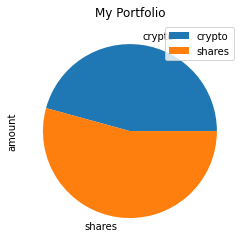

In [37]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="My Portfolio")

In [47]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'][0] + df_savings['amount'][1]

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations on having sufficient funds for emergencies.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your financial goals.")
elif total_savings < emergency_fund:
    print(f"You need {round(emergency_fund - total_savings, 2)} more to reach your emergeny funds goal.")

Congratulations on having sufficient funds for emergencies.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [49]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-09-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-16', tz='America/New_York').isoformat()

In [57]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2017-08-25 00:00:00-04:00  110.05  110.19  110.01  110.130  2050492  244.90   
2017-08-28 00:00:00-04:00  110.17  110.24  110.10  110.170  2822250  245.13   
2017-08-29 00:00:00-04:00  110.48  110.49  110.26  110.330  1710077  243.11   
2017-08-30 00:00:00-04:00  110.27  110.33  110.24  110.290  1357572  244.83   
2017-08-31 00:00:00-04:00  110.31  110.46  110.31  110.435  4179400  246.73   

                                                             
                             high     low   close    volume  
time                                                         
2017-08-25 00:00:00-04:00  245.61  244.39  244.54  44547887  
2017-08-28 00:00:00-04:00  245.20  244.09  244.59  24811471  
2017-08-29 00:00:00-04:00  245.15  242.93  244.85  40179210  
2017-08-30 00:00:00-04:00  246.32  244.62  246.04  40088765  
2017-08-31 00:00:00-04:00  247.77  246.61  247.42  52550897

In [53]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6, .4],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [54]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
time                                                                   
2017-08-24 00:00:00-04:00  110.07  110.16  109.99  110.04  2003978.0   
2017-08-25 00:00:00-04:00  110.05  110.19  110.01  110.13  2050492.0   
2017-08-28 00:00:00-04:00  110.17  110.24  110.10  110.17  2822250.0   
2017-08-29 00:00:00-04:00  110.48  110.49  110.26  110.33  1710077.0   
2017-08-30 00:00:00-04:00  110.27  110.33  110.24  110.29  1357572.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-08-24 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-08-25 00:00:00-04:00     0.000818  244.90  245.61  244.39  244.54   
2017-08-28 00:00:00-04:00     0.000363  245.13  245.20  244.09  244.59   
2017-08-29 00:00:00-04:00     0.001452  243.11  245.15  242.93  244.85   
2017-08-30 00:00:00-04:00    -0.000363  244.83  246.32  244.62  246.04   

                                                    
                               volume daily_return  
time                                                
2017-08-24 00:00:00-04:00         NaN          NaN  
2017-08-25 00:00:00-04:00  44547887.0          NaN  
2017-08-28 00:00:00-04:00  24811471.0     0.000204  
2017-08-29 00:00:00-04:00  40179210.0     0.001063  
2017-08-30 00:00:00-04:00  40088765.0     0.004860

In [58]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Tony\Desktop\FinTech Bootcamp\Financial-Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013687,0.998727,0.994420,0.996259,0.988218,1.012368,0.996259,1.007608,0.995252,0.996640,...,0.998649,0.999173,1.003582,1.001046,1.000566,0.991406,1.004516,1.001341,1.000825,0.995510
2,1.017360,1.007743,0.991010,0.998199,0.988877,1.008937,0.999197,1.009665,1.000383,1.002754,...,1.007408,1.002851,1.005234,1.002805,1.004480,0.996396,1.010338,1.002010,1.001744,0.992458
3,1.011045,1.009642,0.988512,1.005327,0.985502,1.003969,1.000322,1.009628,1.000793,1.006011,...,1.013931,1.004282,0.997841,1.008503,1.004051,0.998118,1.014456,1.001603,0.996683,0.986177
4,1.012141,1.014170,0.993409,1.010151,0.994551,1.004919,1.006029,1.002989,0.998621,1.010425,...,1.004759,0.992897,0.993013,1.019531,1.008989,1.009945,1.013677,1.001578,0.985455,0.977232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.531506,1.856700,1.446730,1.411903,1.740485,1.179751,1.135392,1.525029,1.418998,1.227914,...,1.677690,1.249040,0.809395,1.271149,0.856411,1.393724,1.638630,1.472485,1.542820,1.764056
1257,1.547179,1.866630,1.449187,1.411121,1.741545,1.192220,1.124345,1.515216,1.416853,1.228667,...,1.689187,1.255117,0.810315,1.272089,0.860072,1.384498,1.655393,1.482064,1.531012,1.776325
1258,1.544248,1.863805,1.455826,1.401324,1.741771,1.191446,1.119234,1.513422,1.413050,1.224306,...,1.685440,1.269124,0.818838,1.281206,0.874421,1.378803,1.657470,1.505324,1.530960,1.763208
1259,1.530470,1.876746,1.465895,1.394711,1.746148,1.194743,1.121454,1.523361,1.421305,1.234788,...,1.700697,1.272165,0.819486,1.282948,0.859947,1.378010,1.659319,1.513786,1.523640,1.767658


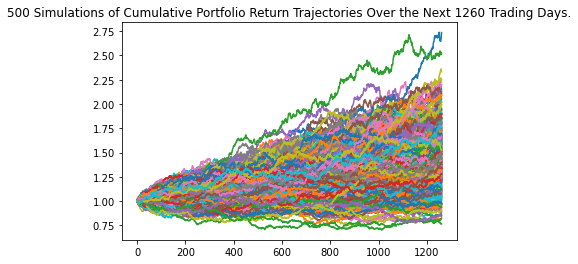

In [59]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

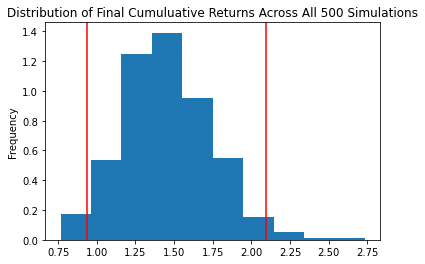

In [60]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

### Retirement Analysis

In [61]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.455419
std               0.289559
min               0.764865
25%               1.260196
50%               1.429320
75%               1.642307
max               2.735113
95% CI Lower      0.937676
95% CI Upper      2.092674
Name: 1260, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [62]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $18753.53 and $41853.48


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [63]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $28130.29 and $62780.22


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


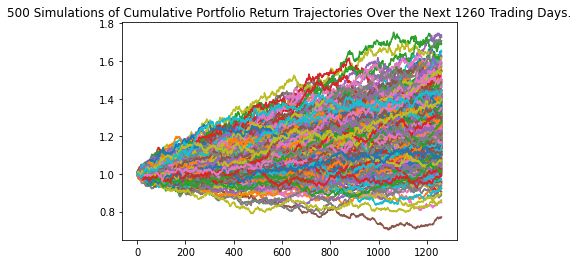

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

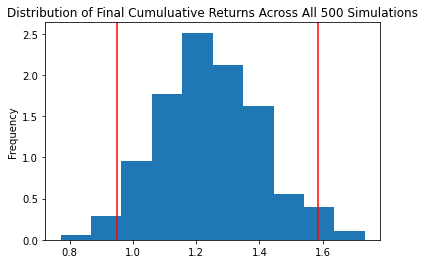

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


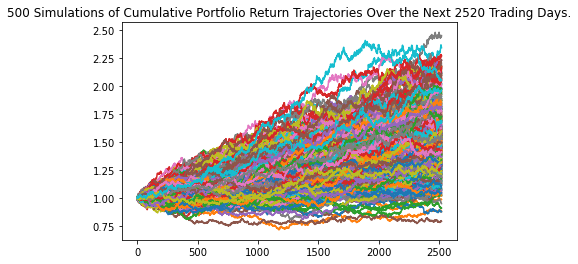

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

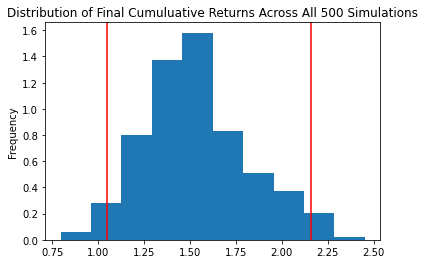

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
